1: Imports & Load Splits

In [ ]:
import pickle

with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)
with open("y_train.pkl", "rb") as f:
    y_train = pickle.load(f)
with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

print("✅ Loaded corrected splits:")
print(f"  • X_train: {X_train.shape}")
print(f"  • X_test : {X_test.shape}")
print(f"  • y_train: {y_train.shape}")
print(f"  • y_test : {y_test.shape}")


2: Train & Evaluate Default Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Train the default Decision Tree
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)

# 2. Predict on test set
y_pred = clf_default.predict(X_test)
y_proba = clf_default.predict_proba(X_test)[:, 1]

# 3. Compute metrics
acc   = accuracy_score(y_test, y_pred)
prec  = precision_score(y_test, y_pred)
rec   = recall_score(y_test, y_pred)
f1    = f1_score(y_test, y_pred)
roc   = roc_auc_score(y_test, y_proba)

# 4. Print results
print("▶️ Default Decision Tree Performance:")
print(f"  • Accuracy : {acc:.4f}")
print(f"  • Precision: {prec:.4f}")
print(f"  • Recall   : {rec:.4f}")
print(f"  • F1 Score : {f1:.4f}")
print(f"  • ROC AUC  : {roc:.4f}")


3: Confusion Matrix & ROC Curve

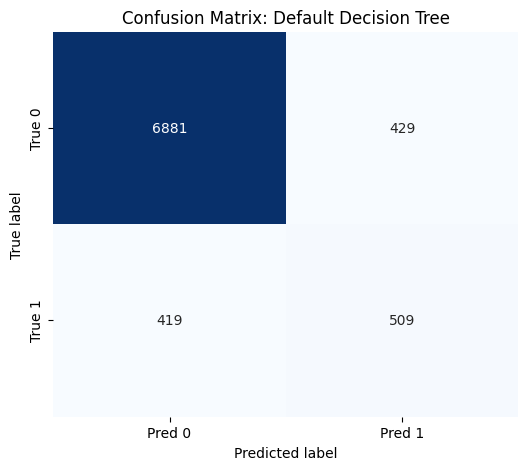

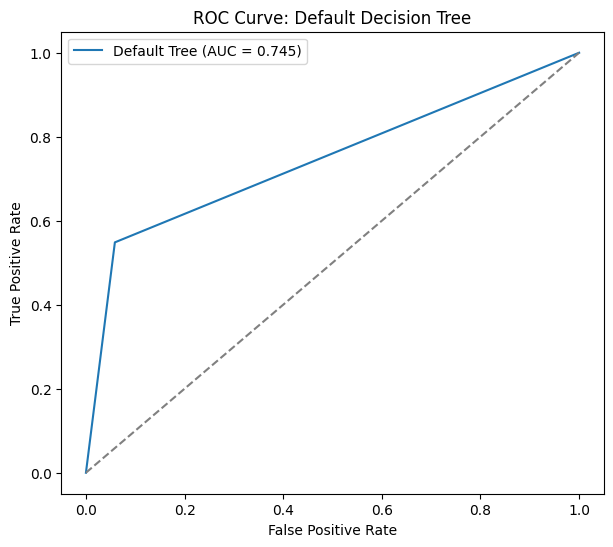

In [4]:
# %% Cell 3: Confusion Matrix & ROC Curve

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=['Pred 0', 'Pred 1'],
    yticklabels=['True 0', 'True 1']
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix: Default Decision Tree")
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"Default Tree (AUC = {roc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Default Decision Tree")
plt.legend()
plt.show()


4 – Feature Importance (Top 10)

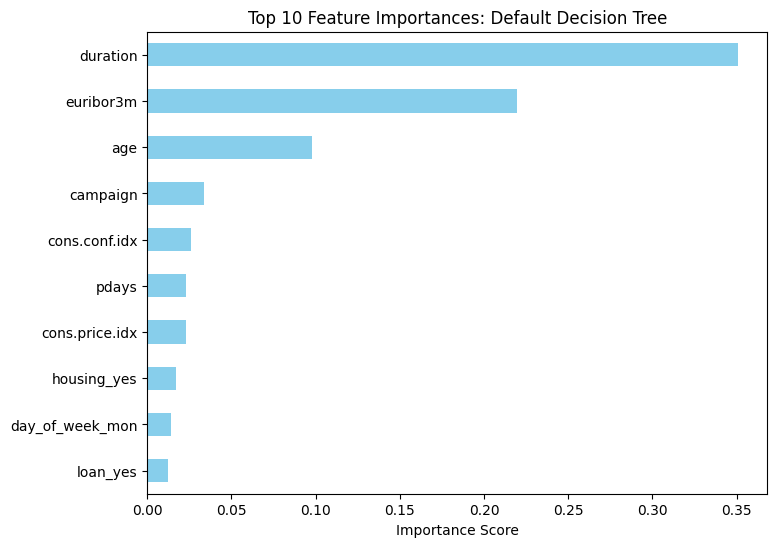

▶️ Top 10 Feature Importances:
  • duration: 0.3507
  • euribor3m: 0.2197
  • age: 0.0980
  • campaign: 0.0340
  • cons.conf.idx: 0.0261
  • pdays: 0.0232
  • cons.price.idx: 0.0228
  • housing_yes: 0.0173
  • day_of_week_mon: 0.0139
  • loan_yes: 0.0123


In [5]:
# %% Cell 4: Feature Importance (Top 10)

import pandas as pd
import matplotlib.pyplot as plt

# 1. Extract feature importances into a pandas Series
importances = pd.Series(clf_default.feature_importances_, index=X_train.columns)

# 2. Select top 10 features by importance
top10 = importances.sort_values(ascending=False).head(10)

# 3. Plot a horizontal bar chart
plt.figure(figsize=(8, 6))
top10.plot(kind="barh", color="skyblue")
plt.gca().invert_yaxis()  # highest importance on top
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importances: Default Decision Tree")
plt.show()

# 4. Print numeric values of the top 10
print("▶️ Top 10 Feature Importances:")
for feature, score in top10.items():
    print(f"  • {feature}: {score:.4f}")


5 – Visualize a Shallow Decision Tree

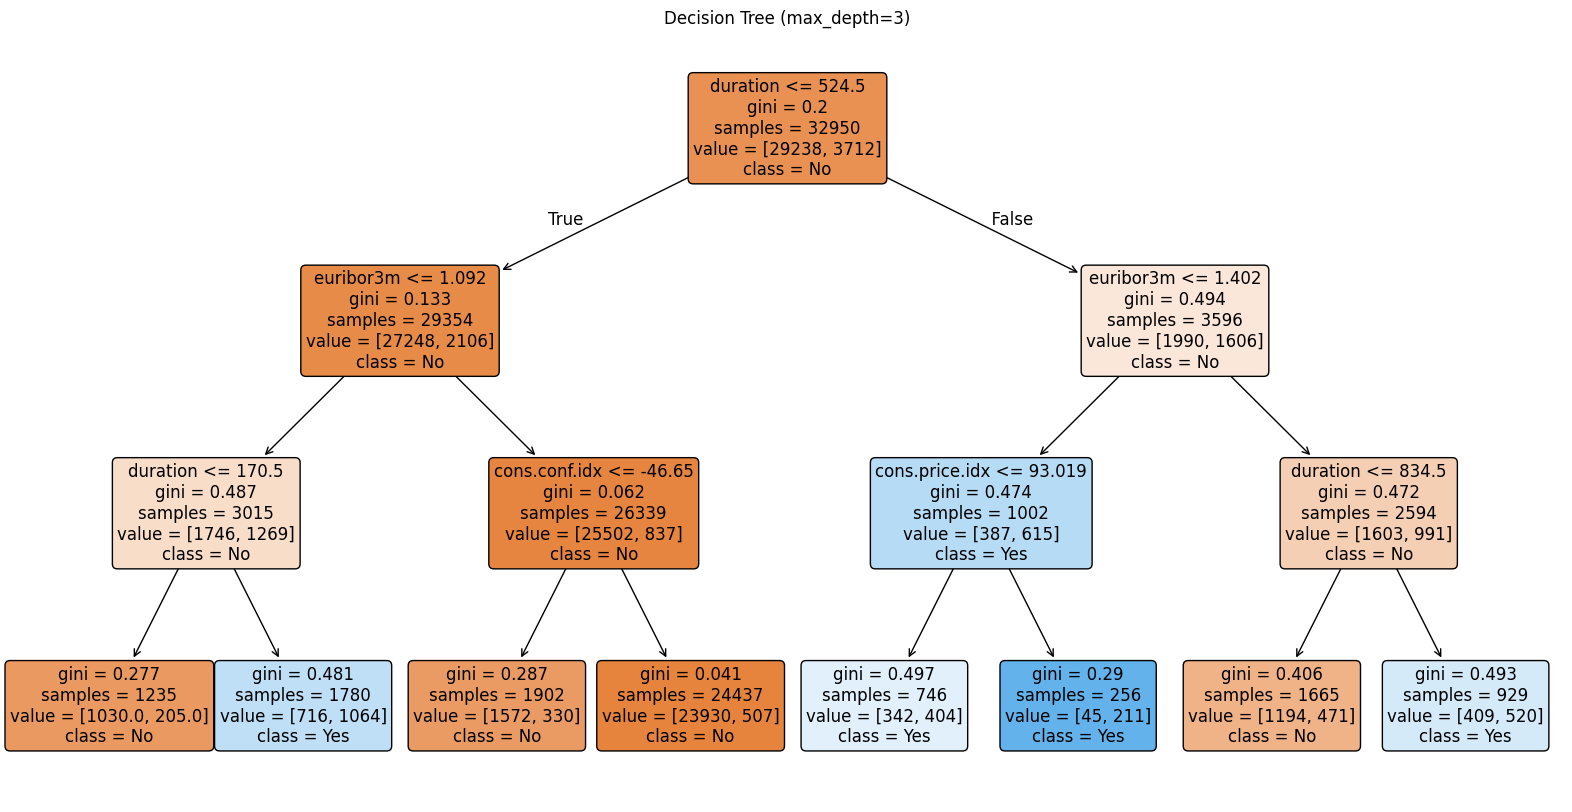

In [6]:
# %% Cell 5: Visualize a Shallow Decision Tree (max_depth=3)

from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Train a shallower tree for easier visualization
clf_shallow = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_shallow.fit(X_train, y_train)

# 2. Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf_shallow, 
    feature_names=X_train.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree (max_depth=3)")
plt.show()


5-Fold Cross-Validation on Training Set

In [7]:
# %% Cell 6: 5-Fold Cross-Validation on Training Data

from sklearn.model_selection import cross_val_score

# Perform 5-fold CV on X_train / y_train
cv_scores = cross_val_score(
    clf_default,          # the default tree
    X_train, 
    y_train, 
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1
)

print("▶️ 5-Fold CV Accuracy on Training Data (Default Tree):")
for i, score in enumerate(cv_scores, start=1):
    print(f"  • Fold {i}: {score:.4f}")
print(f"  • Mean CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


▶️ 5-Fold CV Accuracy on Training Data (Default Tree):
  • Fold 1: 0.8869
  • Fold 2: 0.8879
  • Fold 3: 0.8822
  • Fold 4: 0.8788
  • Fold 5: 0.8941
  • Mean CV Accuracy: 0.8860 ± 0.0052
